In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('C:/Users/DELL/Downloads/sales-of-shampoo-over-a-three-ye.csv')
df.head()

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


In [3]:
df['Month'] = pd.to_datetime(df['Month'], format='%d-%b') 


In [4]:
df.set_index('Month', inplace=True)

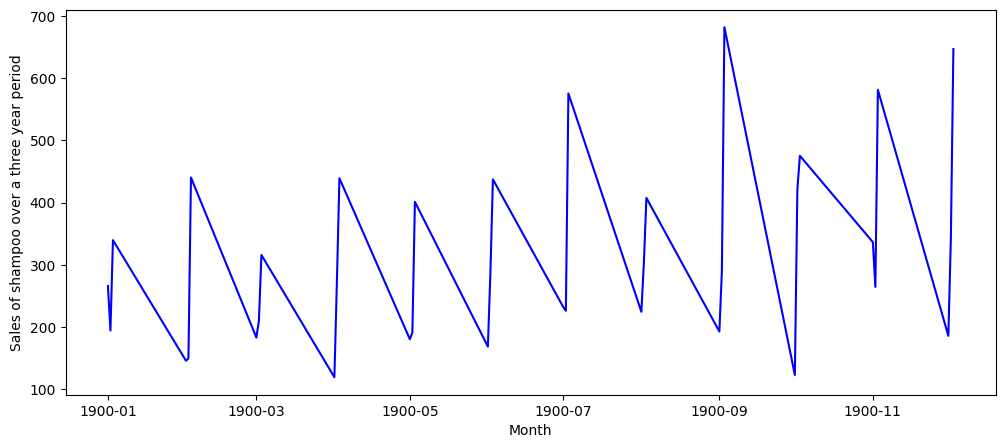

In [5]:
plt.figure(figsize=(12,5))
sns.lineplot(data = df, x = df.index, y = 'Sales of shampoo over a three year period', color = 'blue')
plt.show()

In [6]:
# Is Data stationary?
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

def ad_test(series):
    result = adfuller(series)
    print('ADF statistics:',result[0])
    print('P-value: ', result[1])
    
ad_test(df['Sales of shampoo over a three year period'])


ADF statistics: 3.0601420836411815
P-value:  1.0


In [7]:
# Since the data is non-stationary, we transform
df['Sales of shampoo over a three year period transformed'] = df['Sales of shampoo over a three year period'].diff().dropna()




In [8]:
# Option 2: Drop the first row by position using iloc
df = df.iloc[1:]

# Reset the index if desired
df.reset_index(drop=True, inplace=True)


In [9]:
ad_test(df['Sales of shampoo over a three year period transformed'])

ADF statistics: -7.249074055553854
P-value:  1.7998574141687034e-10


In [10]:
# Now that data is stationary, we decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Sales of shampoo over a three year period transformed'], model='additive')
fig  = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None